<img height=300 width=300 src="iris_petal_sepal.png" />

### Importing libraries for Dataset & graph Plotting

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

### Info about iris Dataset

In [2]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

### ***Data***

In [3]:
iris.data[5]

array([5.4, 3.9, 1.7, 0.4])

In [4]:
iris.data_module

'sklearn.datasets.data'

In [5]:
iris.data.shape

(150, 4)

### ***Feature Name***

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### ***Target***

In [7]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### ***Target Name***

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
print(iris.frame)

None


## Scatter Plot

In [10]:
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
df['species'] = iris.target
species_map = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
df['species'] = df['species'].map(species_map)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa



### Sepal Length v/s Sepal Width

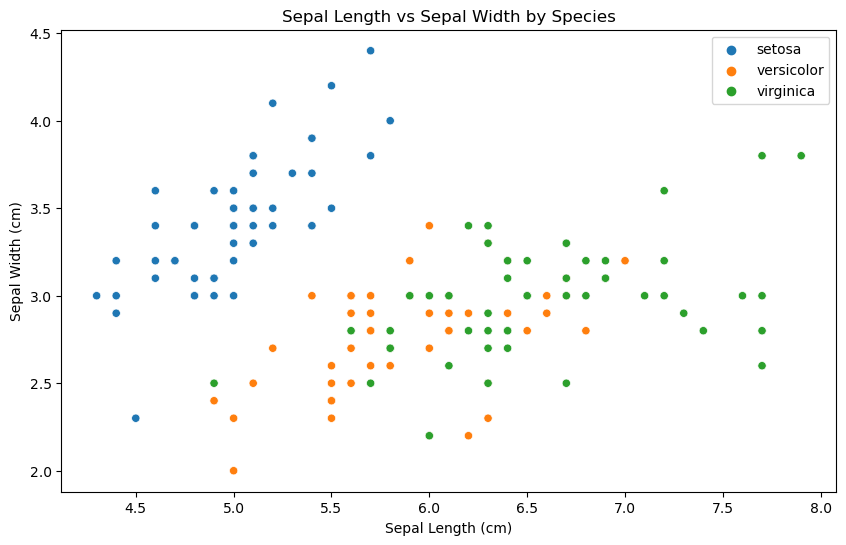

In [12]:
# Scatter plot: Sepal length vs. Sepal width
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='species')


# Adding labels and title
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width by Species')
plt.legend()
plt.show()


### Petal Length v/s Petal Width

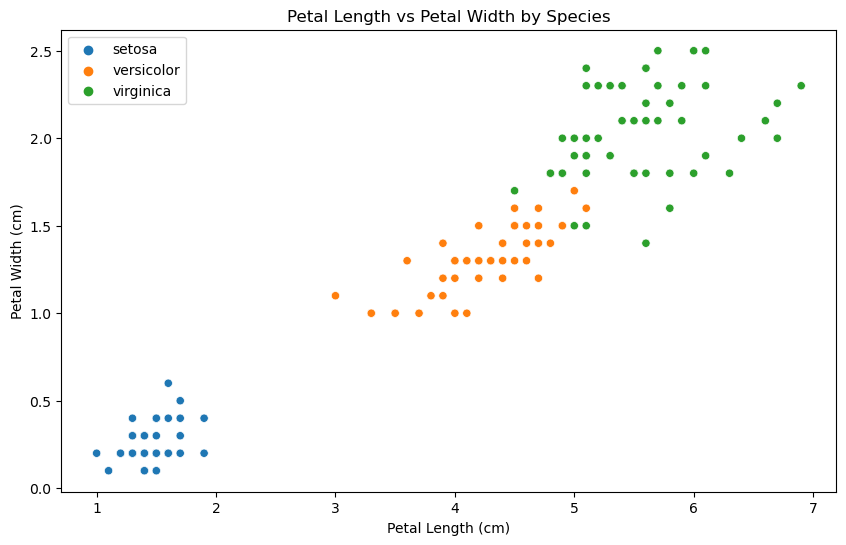

In [13]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data = df, x = 'petal length (cm)', y = 'petal width (cm)', hue = 'species')

# Adding labels and title
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Petal Width by Species')
plt.legend()
plt.show()


## Splitting Feature & Label, Training & Test Set

In [14]:
x = df.iloc[:, :-1].values
y = iris.target

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

## Training & Prediction on Logistic Regression Model

In [16]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [17]:
log_reg.fit(x_train, y_train)

/Users/priyanshupulak/anaconda3/envs/new_environment/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
y_predicted = log_reg.predict(x_test)
y_predicted

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [19]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

### Accuracy Score, Confusion Matrix & Heat Map

In [20]:
log_reg.score(x_test, y_test)

1.0

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

Text(45.722222222222214, 0.5, 'Actual')

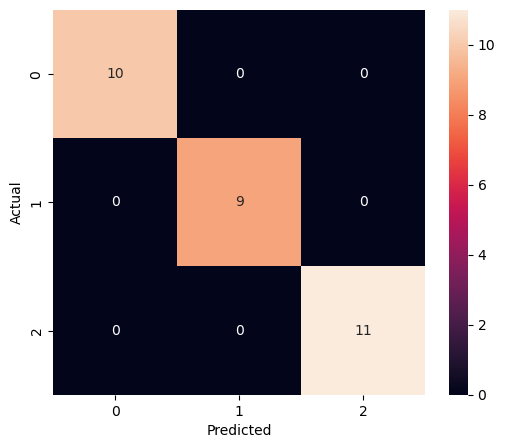

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (6, 5))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

### Prediction

In [23]:
log_reg.predict([iris.data[5]])

array([0])

In [24]:
iris.target[5]

0

In [25]:
log_reg.predict([iris.data[135]])

array([2])

In [26]:
iris.target[135]

2

## Logistic Regression Visualisation

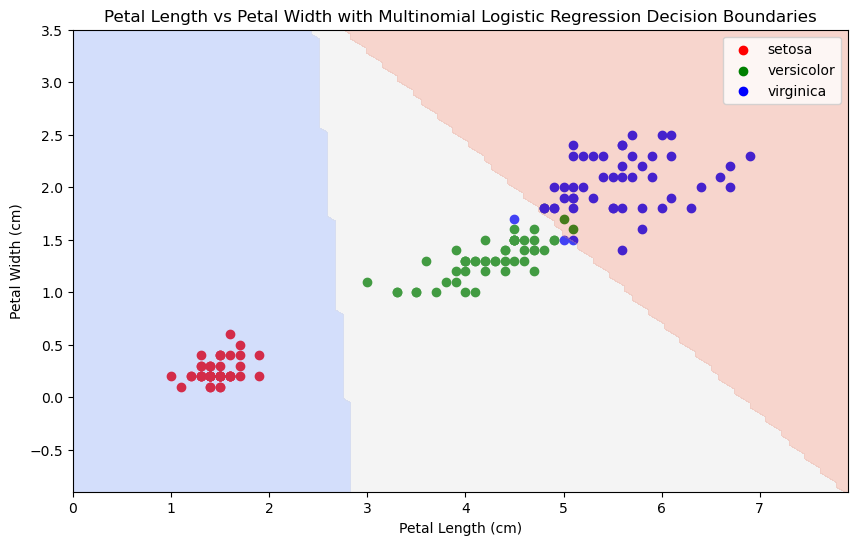

In [28]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

# Prepare features and labels
X = df[['petal length (cm)', 'petal width (cm)']].values
y = df['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2}).values

# Fit multinomial logistic regression model
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_reg.fit(X, y)

# Plot the scatter plot for each species
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']
for idx, species in enumerate(['setosa', 'versicolor', 'virginica']):
    subset = df[df['species'] == species]
    plt.scatter(subset['petal length (cm)'], subset['petal width (cm)'], label=species, color=colors[idx])

# Define the range for decision boundary plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict class for each point in the meshgrid
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm', levels=[-0.5, 0.5, 1.5, 2.5])

# Adding labels and title
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Petal Width with Multinomial Logistic Regression Decision Boundaries')
plt.legend()
plt.show()
